In [ ]:
#첫번째 모델과의 차이점: batch_size를 720(약 한달치 데이터)로 설정

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
cd /content/drive/MyDrive/comma_ai_dev/Probono-AI-Model

/content/drive/MyDrive/comma_ai_dev/Probono-AI-Model


In [ ]:
df = pd.read_csv('pildong_data.csv', index_col=0, parse_dates=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
train = df.iloc[:-1440]  #test 데이터셋: 7320
test = df.iloc[-1440:] #train 데이터셋: 1440 (두달치 data)

In [ ]:
 #데이터 scaling
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
pd.DataFrame(scaled_train, index = train.index, columns=train.columns)

,population
Datetime,
2022-08-01 00:00:00,0.073177
2022-08-01 01:00:00,0.069470
2022-08-01 02:00:00,0.071029
2022-08-01 03:00:00,0.072353
2022-08-01 04:00:00,0.078535
...,...
2023-06-01 19:00:00,0.422009
2023-06-01 20:00:00,0.357275
2023-06-01 21:00:00,0.259326


In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
scaled_train = scaled_train.reshape(-1)
scaled_test = scaled_test.reshape(-1)
print(scaled_train.shape)
print(scaled_test.shape)

(7320,)
(1440,)


In [ ]:
n_steps = 720 #일주일치 데이터
n_features = 1  #단변량 데이터

x_train, y_train = split_sequence(scaled_train, n_steps) #x_train = (7320,720), y_train = (7320,1)
x_test, y_test = split_sequence(scaled_test, n_steps) #x_test = (720,720), y_test = (720,1)

In [ ]:
pd.DataFrame(x_train.T,
             index = [f'day{x+1}' for x in range(x_train.shape[1])],
             columns = [f'input_{x+1}' for x in range(x_train.shape[0])])

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,...,input_6591,input_6592,input_6593,input_6594,input_6595,input_6596,input_6597,input_6598,input_6599,input_6600
day1,0.073177,0.069470,0.071029,0.072353,0.078535,0.089083,0.112150,0.171086,0.292928,0.401148,...,0.877431,0.834127,0.786923,0.727913,0.560640,0.420539,0.337010,0.269465,0.208468,0.164846
day2,0.069470,0.071029,0.072353,0.078535,0.089083,0.112150,0.171086,0.292928,0.401148,0.435848,...,0.834127,0.786923,0.727913,0.560640,0.420539,0.337010,0.269465,0.208468,0.164846,0.143038
day3,0.071029,0.072353,0.078535,0.089083,0.112150,0.171086,0.292928,0.401148,0.435848,0.502107,...,0.786923,0.727913,0.560640,0.420539,0.337010,0.269465,0.208468,0.164846,0.143038,0.145144
day4,0.072353,0.078535,0.089083,0.112150,0.171086,0.292928,0.401148,0.435848,0.502107,0.503906,...,0.727913,0.560640,0.420539,0.337010,0.269465,0.208468,0.164846,0.143038,0.145144,0.144513
day5,0.078535,0.089083,0.112150,0.171086,0.292928,0.401148,0.435848,0.502107,0.503906,0.513255,...,0.560640,0.420539,0.337010,0.269465,0.208468,0.164846,0.143038,0.145144,0.144513,0.144891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
day716,0.273920,0.221058,0.165564,0.126203,0.105386,0.088068,0.089409,0.086542,0.087629,0.090183,...,0.596072,0.716039,0.860400,0.853110,0.862817,0.857648,0.818271,0.757418,0.677046,0.518521
day717,0.221058,0.165564,0.126203,0.105386,0.088068,0.089409,0.086542,0.087629,0.090183,0.097282,...,0.716039,0.860400,0.853110,0.862817,0.857648,0.818271,0.757418,0.677046,0.518521,0.422009
day718,0.165564,0.126203,0.105386,0.088068,0.089409,0.086542,0.087629,0.090183,0.097282,0.131235,...,0.860400,0.853110,0.862817,0.857648,0.818271,0.757418,0.677046,0.518521,0.422009,0.357275
day719,0.126203,0.105386,0.088068,0.089409,0.086542,0.087629,0.090183,0.097282,0.131235,0.203704,...,0.853110,0.862817,0.857648,0.818271,0.757418,0.677046,0.518521,0.422009,0.357275,0.259326


In [ ]:
pd.DataFrame(y_train.T,
             index = [f'output_{x+1}' for x in range(y_train.shape[0])],
             columns = [f'day1'])

,day1
output_1,0.088068
output_2,0.089409
output_3,0.086542
output_4,0.087629
output_5,0.090183
...,...
output_6596,0.422009
output_6597,0.357275
output_6598,0.259326
output_6599,0.193722


In [ ]:
model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps,n_features))) #first layer
model.add(Dropout(0.3))

model.add(LSTM(units = 64)) #second layer
model.add(Dropout(0.3))

model.add(Dense(1)) #output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
#모델의 loss가 10epoch 동안 동일하면 학습을 중단

history = model.fit(x_train, y_train, epochs=50, callbacks=[early_stopping])

Epoch 1/50
207/207 [==============================] - 169s 817ms/step - loss: 0.0290 - mae: 0.1229
Epoch 2/50
207/207 [==============================] - 169s 815ms/step - loss: 0.0068 - mae: 0.0604
Epoch 3/50
207/207 [==============================] - 169s 816ms/step - loss: 0.0059 - mae: 0.0558
Epoch 4/50
207/207 [==============================] - 171s 825ms/step - loss: 0.0049 - mae: 0.0503
Epoch 5/50
207/207 [==============================] - 172s 831ms/step - loss: 0.0043 - mae: 0.0461
Epoch 6/50
207/207 [==============================] - 172s 829ms/step - loss: 0.0039 - mae: 0.0440
Epoch 7/50
207/207 [==============================] - 171s 828ms/step - loss: 0.0035 - mae: 0.0416
Epoch 8/50
207/207 [==============================] - 172s 829ms/step - loss: 0.0032 - mae: 0.0393
Epoch 9/50
207/207 [==============================] - 173s 835ms/step - loss: 0.0029 - mae: 0.0374
Epoch 10/50
207/207 [==============================] - 169s 815ms/step - loss: 0.0027 - mae: 0.0361
Epoch 11/

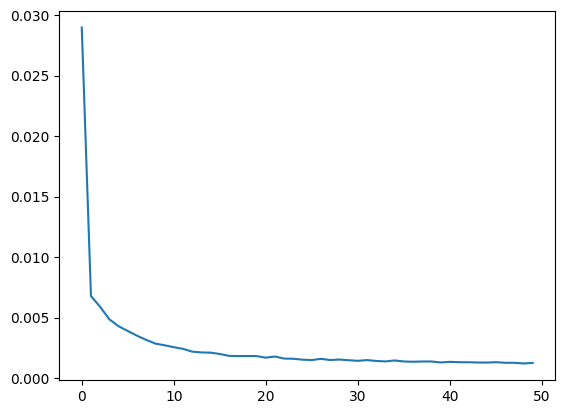

In [ ]:
import matplotlib.pyplot as plt
myloss = model.history.history['loss']
plt.plot(range(len(myloss)), model.history.history['loss'])

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# tratrainPredict = scaler.inverse_transform(trainPredict)
#train값과 test값 예측
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

# 역정규화 과정
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# rmse 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

23/23 [==============================] - 2s 93ms/step
Train Score: 573.82 RMSE
Test Score: 491.69 RMSE


<Axes: xlabel='Datetime'>

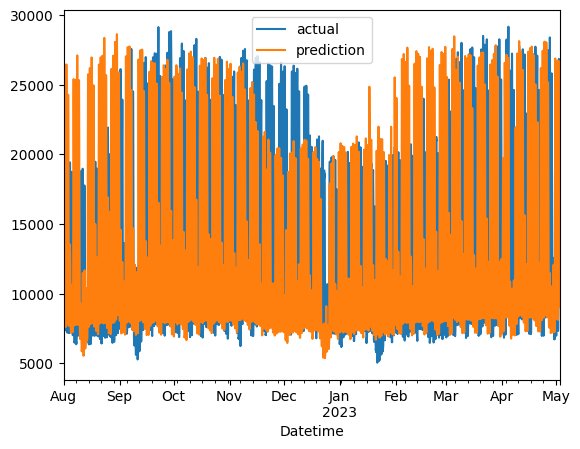

In [ ]:
val_train  = pd.DataFrame() #예측값 검증을 위한 df 생성

trainPredict = pd.DataFrame(trainPredict)
trainPredict.index = train[:len(trainPredict)].index #실제 test 범위에 해당하는 index 매칭

val_train['actual'] = train[:len(trainPredict)] #실제 값 할당
val_train['prediction'] = trainPredict #예측한 값 할당

val_train.plot()

<Axes: xlabel='Datetime'>

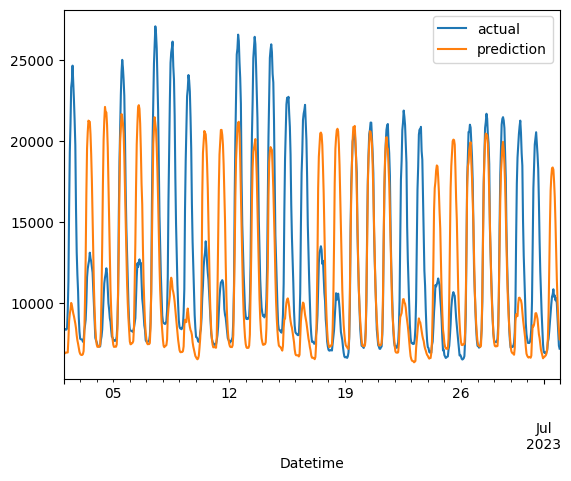

In [ ]:
val_test = pd.DataFrame() #예측값 검증을 위한 df 생성

testPredict = pd.DataFrame(testPredict)
testPredict.index = test[:len(testPredict)].index #실제 test 범위에 해당하는 index 매칭

val_test['actual'] = test[:len(testPredict)] #실제 값 할당
val_test['prediction'] = testPredict #예측한 값 할당

val_test.plot()

In [ ]:
from keras.models import load_model
model.save("population_predict(0823).h5")